
### Chapter 16 - Repeated Measures and Other Multivariate Responses


#### Terms
- __Multivariate Response__ - responses with several components 
- __Repeated Measure__ - a special kind of multivariate response obtained by measuring the same variable on eahc subject several times _(possibly under different conditions)_



# Case 1601 - Short and Long Term Memory

![](https://bayhouselrc.files.wordpress.com/2016/01/monkey.png?w=712)

__Hypothesis:__ The hippocampal formation is not a repository of permanent memory. 

> To test the hypothesis, they trained 18 monkeys to discriminate 100 pairs of objects, 20 pairs each at 16, 12, 8, 4, and 2 weeks prior to a treatment. The objects were toys, cans, odd pieces of wood, etc., randomly selected from a population of such objects used for behavioral studies. After learning to distinguish each of the 100 pairs of objects, 11 monkeys were treated by blocking access to their hippocampal formations. The remaining 7 monkeys were untreated controls.

__Response: % of objects learned during each of the weeks prior correctly identified__

If the hypothesis is correct, then treated monkeys should have similar long term memory to contorl monkeys, but worse short term memory

source: http://stat512.cwick.co.nz/lectures/23-multivariate.pdf

In [1]:
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')

# Statistical Packages
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
memory = pd.read_csv("./data/case1601.csv")
memory.head()

,Monkey,Treatment,Week2,Week4,Week8,Week12,Week16
0,Spank,Control,95,75,80,65,70
1,Chim,Control,85,75,55,75,85
2,Chak,Control,75,95,60,40,45
3,Alf,Control,85,80,70,45,80
4,Poet,Control,65,80,75,65,65


In [130]:
memory_ = memory.groupby('Treatment').agg({'Week2':'mean',
                                'Week4':'mean',
                                'Week8':'mean',
                                'Week12':'mean',
                                'Week16':'mean'}).T.reset_index()
memory_

Treatment,index,Control,Treated
0,Week2,78.571429,62.272727
1,Week4,82.142857,64.090909
2,Week8,70.714286,65.454545
3,Week12,62.142857,72.272727
4,Week16,70.000000,67.272727


In [132]:
memory_2 = memory_[['Control','Treated']].stack().reset_index()
memory_2.head()

,level_0,Treatment,0
0,0,Control,78.571429
1,0,Treated,62.272727
2,1,Control,82.142857
3,1,Treated,64.090909
4,2,Control,70.714286


Remap using a dictoray for the `Weeks`

In [133]:
d = {0: 'Week2',
     1: 'Week4',
     2: 'Week8',
     3: 'Week12',
     4: 'Week16'}

In [134]:
# weeks = ['Week2','Week2', 'Week4','Week4', 'Week8', 'Week8','Week12', 'Week12','Week16','Week16']
#memory_2['Weeks'] = weeks
#memory_2['Weeks'] = memory_2['Weeks'].astype('category')
memory_2['level_0'] = memory_2.level_0.map(d)

memory_2.columns = ['Weeks', 'Treatment', 'PercCorrect']
memory_2.head()

,Weeks,Treatment,PercCorrect
0,Week2,Control,78.571429
1,Week2,Treated,62.272727
2,Week4,Control,82.142857
3,Week4,Treated,64.090909
4,Week8,Control,70.714286


Below is a plot of the __Averaged correct scores over each measured week__. 

C:\Users\phhale\AppData\Local\Continuum\anaconda3\envs\bril\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


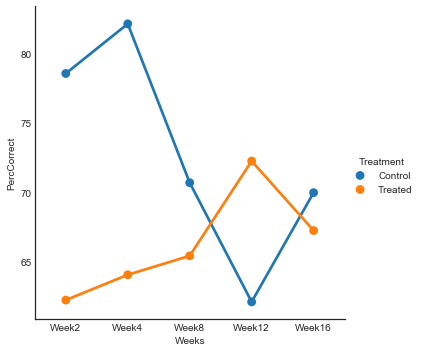

In [135]:
sns.factorplot(x='Weeks', y='PercCorrect', hue='Treatment',
            data=memory_2)

C:\Users\phhale\AppData\Local\Continuum\anaconda3\envs\bril\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


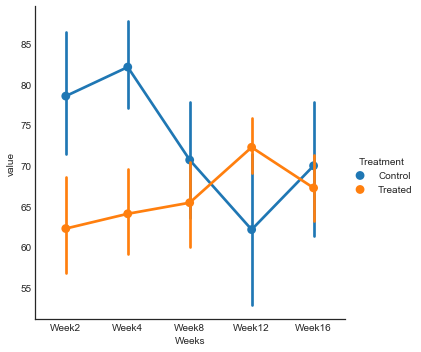

In [247]:
df_ = pd.melt(memory, id_vars=['Treatment','Monkey'], var_name='Weeks')
df_.head()
sns.factorplot(x='Weeks', y='value', hue='Treatment',data=df_, )


When looking at the plot above, based off the experimental design, looking at the graph left to right, incrasing in weeks we would expect shorter term memory to correspond to shorter weeks and long term memory correspond with more week passed. 

`Week 2` shows a big difference for recall but as we progress to `Week 18` the long term memory is about the same. 

In [244]:
monkey = memory.groupby('Monkey').agg({'Week2':'mean',
                                'Week4':'mean',
                                'Week8':'mean',
                                'Week12':'mean',
                                'Week16':'mean'}).reset_index()
c = monkey[['Week2','Week4','Week8','Week12','Week16']].T.reset_index()
ls = list(monkey.Monkey)
ls.insert(0, 'Weeks')
c.columns = ls
c

,Weeks,Alf,Allen,Andy,Chak,Chim,Cornelius,Duncan,Edy,Irv,Jessie,Joey,Junior,Just,Phil,Poe,Poet,Spank,Sport
0,Week2,85,60,55,75,85,45,65,85,75,70,65,60,55,75,60,65,95,60
1,Week4,80,70,65,95,75,60,55,85,50,90,60,55,70,80,65,80,75,70
2,Week8,70,70,45,60,55,65,55,60,70,85,80,75,60,70,70,75,80,70
3,Week12,45,75,70,40,75,65,80,70,75,75,70,70,65,70,70,65,65,85
4,Week16,80,70,65,45,85,70,75,70,75,75,60,50,75,70,60,65,70,70


In [222]:
c.Weeks[0] = 2
c.Weeks[1] = 4
c.Weeks[2] = 8
c.Weeks[3] = 12
c.Weeks[4] = 16

C:\Users\phhale\AppData\Local\Continuum\anaconda3\envs\bril\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\phhale\AppData\Local\Continuum\anaconda3\envs\bril\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\phhale\AppData\Local\Continuum\anaconda3\envs\bril\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-c

Repeated measures for each monkey.

#### Control Monkeys

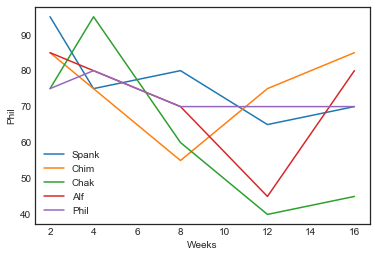

In [229]:
sns.lineplot(x='Weeks', y=c.columns[17], data=c, label="Spank");
sns.lineplot(x='Weeks', y=c.columns[5], data=c, label="Chim");
sns.lineplot(x='Weeks', y=c.columns[4], data=c, label="Chak");
sns.lineplot(x='Weeks', y=c.columns[1], data=c, label="Alf");
sns.lineplot(x='Weeks', y=c.columns[14], data=c, label="Phil");

we can see for:
- `Spank` had god short term memory and got worse over time
- `Chim` is able to remember more short term and long temr. 
- `Chak` appears to remember almost nothing after 12 weks
- `Alf` apparently went flat at week 12
- `Phil` was not really affected, and remember about the same. 

#### Treated Monkeys

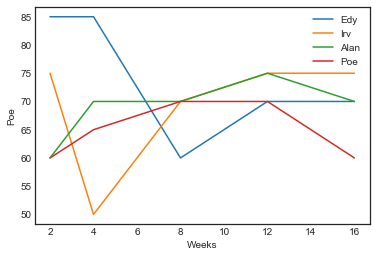

In [234]:
sns.lineplot(x='Weeks', y=c.columns[8], data=c, label="Edy");
sns.lineplot(x='Weeks', y=c.columns[9], data=c, label="Irv");
sns.lineplot(x='Weeks', y=c.columns[2], data=c, label="Alan");
sns.lineplot(x='Weeks', y=c.columns[15], data=c, label="Poe");

Seems that Treated monkeys are doing _as well_ long term than control monkeys however, possible worse short term. 

__Causal Inference__ since we reandomly selected the monkey treatment, we can attribute any variance to the experimental treatment to these monkeys that would stop access to hipoccmpus variability. 

## Testing hypothesis

- __long term__ 8, 12, 16 weeeks
- __Short term__ 2 & 4 weeks

In [264]:
week_term = {'Week2':'short_term',
     'Week4':'short_term',
     'Week8':'long_term',
     'Week12':'long_term',
     'Week16':'long_term'}
df_['term'] = df_.Weeks.map(week_term)

Below we plotted the measures for the response for short term and long term memory reponse. 

__Do treated monkeys have similar short term memory to contorl monkeys?__

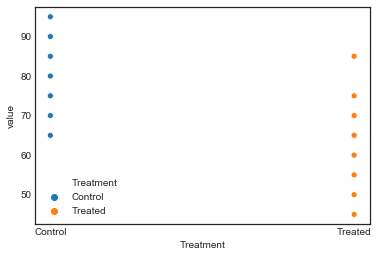

In [261]:
sns.scatterplot(x="Treatment", y='value', hue='Treatment',
                data=df_[df_.term=='short_term'])

We can solve this with 2 sample t-test by tesing the differnece in "sample" means. We would expect logs of difference in means. 

__Do treated monkeys have similar _long term_ memory to control monkeys?__

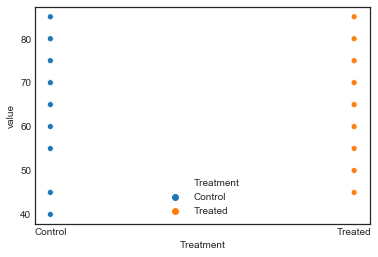

In [263]:
sns.scatterplot(x="Treatment", y='value', hue='Treatment',
                data=df_[df_.term=='long_term'])

Also a t-test, hoping there was no differnece to suppor the hyposthese.

__We could only peform the t-test if the two responses are correlated e.g. independent.__ 

In [295]:
response_1 = list(df_[df_.term=='short_term'].value)
response_2 = list(df_[df_.term=='long_term'].value)

In [289]:
def interpret(p_value, alpha_level=0.05):
    if p_value > alpha_level:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')

def interpret_ci(ci_low, ci_high):
    if (ci_low >= 0) & (ci_high >= 0):
        print('Confidence Interval contains 0. (fail to reject H0)')
    else:
        print('Confidence Interval does not contain 0. (reject H0)')

alpha = 0.05


# compare samples 
stat, p = stats.ttest_ind(response_1, response_2, equal_var=False)
print('Statistics=%.3f, p=%.4f' % (stat, p))
interpret(p, alpha_level= alpha)

# Confidence Interval
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(response_1, ddof=22 ), sms.DescrStatsW(response_2, ddof=13))
ci_low, ci_high =  cm.tconfint_diff(alpha=alpha, alternative="two-sided", usevar='unequal')
print("Confidence Interval from: %.3f to %.3f" % (ci_low, ci_high))
interpret_ci(ci_low, ci_high)

Statistics=0.716, p=0.4766
Same distribution (fail to reject H0)
Confidence Interval from: -3.232 to 6.844
Confidence Interval does not contain 0. (reject H0)
